## Mapping eddy flow structures using GCM-Filters

### Our team:
#### Nora Loose (mentor), Paige Martin (mentor), Ana Clara Mariani, Leticia de Lima


<img src="OurTeam.png" alt="drawing" width="500"/>

### Goals:
- Apply the GCM-Filters to NCAR CESM Global High Resolution Ocean Model Field
- Visualize how the eddy flow structures evolve over time
- Evaluate the Eddy Energy

### The new things we learned while developing this project:
- How to work with a workflow in github
- How to create a conda enviroment
- Various tools in python


In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt 
import gcm_filters
from intake import open_catalog

In [3]:
#loading data
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/CESM_POP.yaml")
ds = cat['CESM_POP_hires_RCP8_5'].to_dask()
ds

<xarray.Dataset>
Dimensions:             (nlat: 2400, nlon: 3600, time: 16401, z_t: 62, z_w: 62,
                         z_t_150m: 15, z_w_bot: 62, z_w_top: 62)
Coordinates: (12/59)
    ANGLE               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ANGLET              (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ...                  ...
    vonkar              float64 ...
  * z_t                 (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m            (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                 (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.75e+05 6e+05
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    SHF_2               (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SSH_2               (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SSS                 (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SST                 (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    TAUX_2              (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    TAUY_2              (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    U1_1                (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    U2_2                (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    V1_1                (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    calendar:      All years have exactly  365 days.
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    contents:      Diagnostic and Prognostic Variables
    history:       none
    nsteps_total:  3535200
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    source:        CCSM POP2, the CCSM Ocean Component
    start_time:    This dataset was created on 2016-05-17 at 03:29:14.8
    tavg_sum:      86399.99999999999
    title:         BRCP85C5CN_ne120_t12_pop62.c13b17.asdphys.001

In [4]:
#See the fields needed to apply the filter:
gcm_filters.required_grid_vars(gcm_filters.GridType.TRIPOLAR_REGULAR_WITH_LAND_AREA_WEIGHTED)

['area', 'wet_mask']

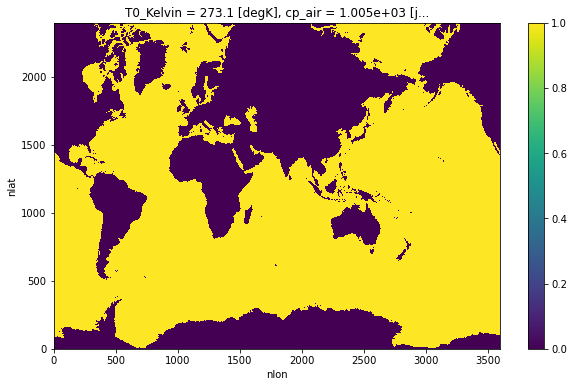

In [5]:
# create fields needed to apply the filter: wet mask and area
wet_mask = xr.where(ds['KMT']>0, 1, 0)
wet_mask.plot(figsize=(10,6), cbar_kwargs={'label': ''});

area = ds.TAREA / 10000  # convert units from cm2 to m2

In [6]:
#This cell tells dask the chunk size in nlon and nlat dimension.
wet_mask = wet_mask.chunk({'nlat': len(ds.nlat), 'nlon': len(ds.nlon)})  # 1 chunk
area = area.chunk({'nlat': len(ds.nlat), 'nlon': len(ds.nlon)})  # 1 chunk

ssh = ds.SSH_2.where(wet_mask)
ssh = ssh.chunk({'nlat': len(ds.nlat), 'nlon': len(ds.nlon)})  # 1 chunk

ssh

<xarray.DataArray 'SSH_2' (time: 16401, nlat: 2400, nlon: 3600)>
dask.array<where, shape=(16401, 2400, 3600), dtype=float32, chunksize=(1, 2400, 3600), chunktype=numpy.ndarray>
Coordinates: (12/52)
    ANGLE               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ANGLET              (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ...                  ...
    sea_ice_salinity    float64 4.0
    sflux_factor        float64 0.1
    sound               float64 1.5e+05
    stefan_boltzmann    float64 5.67e-08
  * time                (time) object 2006-01-02 00:00:00 ... 2051-01-01 00:0...
    vonkar              float64 0.4
Dimensions without coordinates: nlat, nlon
Attributes:
    cell_methods:  time: mean
    grid_loc:      2110
    long_name:     Sea Surface Height
    units:         centimeter

In [7]:
#filter specifications
specs = {
    'filter_scale': 10,
    'dx_min': 1,
    'filter_shape': gcm_filters.FilterShape.GAUSSIAN,
    'grid_type': gcm_filters.GridType.TRIPOLAR_REGULAR_WITH_LAND_AREA_WEIGHTED
}

In [9]:
#create the filter
filter_ssh = gcm_filters.Filter(grid_vars={'area': area, 'wet_mask': wet_mask}, **specs)
filter_ssh


Filter(filter_scale=10, dx_min=1, filter_shape=<FilterShape.GAUSSIAN: 1>, transition_width=3.141592653589793, ndim=2, n_steps=11, grid_type=<GridType.TRIPOLAR_REGULAR_WITH_LAND_AREA_WEIGHTED: 8>)

In [10]:
#Apply the filter
ssh_filtered = filter_ssh.apply(ssh, dims=['nlat', 'nlon'])
ssh_filtered  # note that this is a dask array, so we have filtered "lazily"

<xarray.DataArray (time: 16401, nlat: 2400, nlon: 3600)>
dask.array<transpose, shape=(16401, 2400, 3600), dtype=float32, chunksize=(1, 2400, 3600), chunktype=numpy.ndarray>
Coordinates: (12/52)
    ANGLE               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ANGLET              (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ...                  ...
    sea_ice_salinity    float64 4.0
    sflux_factor        float64 0.1
    sound               float64 1.5e+05
    stefan_boltzmann    float64 5.67e-08
  * time                (time) object 2006-01-02 00:00:00 ... 2051-01-01 00:0...
    vonkar              float64 0.4
Dimensions without coordinates: nlat, nlon

In [11]:
#Calculating the difference SSH - filtered SSH
ssh_SmallScale = ssh - ssh_filtered
ssh_SmallScale  # this is a dask array again

<xarray.DataArray (time: 16401, nlat: 2400, nlon: 3600)>
dask.array<sub, shape=(16401, 2400, 3600), dtype=float32, chunksize=(1, 2400, 3600), chunktype=numpy.ndarray>
Coordinates: (12/52)
    ANGLE               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ANGLET              (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ...                  ...
    sea_ice_salinity    float64 4.0
    sflux_factor        float64 0.1
    sound               float64 1.5e+05
    stefan_boltzmann    float64 5.67e-08
  * time                (time) object 2006-01-02 00:00:00 ... 2051-01-01 00:0...
    vonkar              float64 0.4
Dimensions without coordinates: nlat, nlon

In [14]:
#filter computation over time slice and plotting

vmin = -30
vmax = 30

vmin2 = -2
vmax2 = 2

yslice = slice(1150,1550)
xslice = slice(80,1400)

#yslice = slice(1500, 1750)
#xslice = slice(400, 600)
for t in range(0, 1)#365,5): # len(ds.time)):

    fig,axs = plt.subplots(3,1,figsize=(7,10))
    ssh.isel(nlat=yslice, nlon=xslice, time=t).plot(
        ax=axs[0], 
        vmin=vmin, vmax=vmax, cmap='RdBu',
        cbar_kwargs={'label': 'cm'}
    )
    axs[0].set_title('SSH', fontsize=18)
    axs[0].tick_params(axis='both', which='major', labelsize=12)

    ssh_filtered.isel(nlat=yslice, nlon=xslice, time=t).plot(
        ax=axs[1], 
        vmin=vmin, vmax=vmax, cmap='RdBu',
        cbar_kwargs={'label': 'cm'}
    )
    axs[1].set_title('Large Scale SSH', fontsize=18);
    axs[1].tick_params(axis='both', which='major', labelsize=12)

    ssh_SmallScale.isel(nlat=yslice, nlon=xslice, time=t).plot(
        ax=axs[2], 
        vmin=vmin2, vmax=vmax2, cmap='RdBu',
        cbar_kwargs={'label': 'cm'}
    )
    axs[2].set_title('Small Scale SSH', fontsize=18);
    axs[2].tick_params(axis='both', which='major', labelsize=12)

    fig.tight_layout()
    
    if t<10:
        plt.savefig("Images2/filtered_SSH_00"+str(t)+".jpg")
        
    elif t>=10 and t<100:
        plt.savefig("Images2/filtered_SSH_0"+str(t)+".jpg")
        
    else:
        plt.savefig("Images2/filtered_SSH_"+str(t)+".jpg")


SyntaxError: invalid syntax (1660906778.py, line 14)

In [13]:
#Create the movie from the figures
import ffmpeg

(  ffmpeg
    .input('Images2/*.jpg', pattern_type='glob', framerate=5)
    .output('movie_SSH_scale10.mp4')
    .run()
)


ffmpeg version 5.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 10.4.0 (conda-forge gcc 10.4.0-16)
  configuration: --prefix=/home/jovyan/.conda/envs/gcm-filters-env --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1660333770726/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1660333770726/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1660333770726/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1660333770726/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-vaapi --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static

(None, None)